# **Data Preprocessing: Spotify: 3.4 Million Spotify Google Store Reviews**

# Load the Data

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
df = pd.read_csv('/content/SPOTIFY_REVIEWS.csv')

df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01
3,3,672a155a-e81e-4d28-bdeb-a74c031bc072,286593453219054880269,A Google user,"Awesome UI, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20
4,4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,167276875678680630145,A Google user,As a professional Android developer I'm glad t...,5,10,1.1.0.91,2014-05-27 15:26:48


# Clean the Data

**Check for duplicates**

In [ ]:
# Check for duplicates in the entire DataFrame
duplicates = df[df.duplicated()]

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# View the duplicate rows
print("Duplicate rows:")
print(duplicates)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, review_id, pseudo_author_id, author_name, review_text, review_rating, review_likes, author_app_version, review_timestamp]
Index: []


In [ ]:
# Convert 'review_text' to lowercase
df['review_text'] = df['review_text'].str.lower()
# Remove special characters
df['review_text'] = df['review_text'].str.replace('[^\w\s]', '', regex=True)

**Remove rows or data based on the "review_text" column that is empty or contains only special characters and symbols and duplicates**

In [ ]:
# Print the number of rows before cleaning
initial_row_count = df.shape[0]
print(f"Number of rows before cleaning: {initial_row_count}")

Number of rows before cleaning: 3377423


In [ ]:
# Remove rows where 'review_text' is NaN or contains only special characters
df_cleaned = df[~df['review_text'].str.match(r'^[^\w\s]*$|^$', na=False)]

# Remove NaN values from 'review_text'
df_cleaned = df_cleaned.dropna(subset=['review_text'])

# Print the number of rows after cleaning
final_row_count = df_cleaned.shape[0]
print(f"Number of rows after cleaning: {final_row_count}")

Number of rows after cleaning: 3335382


In [ ]:
# Count occurrences of each review
duplicate_reviews = df_cleaned['review_text'].value_counts()

# Find reviews that have duplicates
duplicate_reviews = duplicate_reviews[duplicate_reviews > 1]

# Initialize a list to hold examples of duplicates
duplicate_examples = []

# Loop through the first four duplicate reviews
for review in duplicate_reviews.index[:4]:  # Get only the first four duplicates
    # Get the rows that contain this duplicate review
    duplicate_rows = df_cleaned[df_cleaned['review_text'] == review]
    duplicate_examples.append(duplicate_rows)

# Concatenate all examples into one DataFrame for easy display
example_df = pd.concat(duplicate_examples)

# Print the results
print("Examples of duplicate reviews:")
example_df[['review_text', 'author_name', 'review_rating']]

Examples of duplicate reviews:


,review_text,author_name,review_rating
7,good,A Google user,5
52,good,A Google user,5
228,good,A Google user,5
285,good,A Google user,5
323,good,A Google user,5
...,...,...,...
3375802,great,Ju*******ez,5
3375807,great,Bu***********ba,5
3375938,great,Ma******************ia,5
3376556,great,Jo*****th,5


In [ ]:
# Count occurrences of each review texts
review_counts = df_cleaned['review_text'].value_counts()

# Filter for review texts that appear more than once
duplicate_reviews = review_counts[review_counts > 1]

# Display review texts with their counts
print("Reviews with multiple entries:")
print(duplicate_reviews)

# Optional: Display the total number of duplicate review texts
print(f"\nTotal number of review texts with multiple entries: {len(duplicate_reviews)}")

Reviews with multiple entries:
review_text
good                  69573
love it               65226
awesome               46228
great                 46060
nice                  30737
                      ...  
music for days            2
its awasome               2
niceyyy                   2
i enjoy this music        2
enjoy free music          2
Name: count, Length: 71326, dtype: int64

Total number of review texts with multiple entries: 71326


In [ ]:
# Print the number of rows before cleaning
initial_row_count = df_cleaned.shape[0]
print(f"Number of rows before cleaning: {initial_row_count}")

Number of rows before cleaning: 3335382


Since there are too many duplicates of the same review text in the "review_text" column, we can remove duplicates because its not really useful

In [ ]:
# Remove duplicates based on the 'review_text' column
df_cleaned = df_cleaned.drop_duplicates(subset='review_text')

final_row_count = df_cleaned.shape[0]
print(f"Number of rows after dropping duplicates: {final_row_count}")
df_cleaned.reset_index(drop=True, inplace=True)

Number of rows after dropping duplicates: 2099663


In [ ]:
# Print the number of rows removed
rows_removed = initial_row_count - final_row_count
print(f"Number of rows removed during cleaning: {rows_removed}")

Number of rows removed during cleaning: 1235719


We also can remove the "review_id" column and "pseudo_author_id" column since it's not useful for chatbot analysis

In [ ]:
# Drop "review_id" column and "pseudo_author_id" column
df_cleaned.drop(columns=['review_id', 'pseudo_author_id', 'author_name'], inplace=True)

In [ ]:
print(f"Number of rows of the cleaned data: {df_cleaned.shape[0]}")

Number of rows of the cleaned data: 2099663


In [ ]:
# Remove the unnamed column (index column)
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('^Unnamed')]

In [ ]:
df_cleaned.head()

,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,i enjoy the awesome ui of this app and it has ...,5,4,1.1.0.91,2014-05-27 14:36:02
2,love it especially the new design,5,2,1.1.0.91,2014-05-27 14:40:01
3,awesome ui best music app out there,5,1,1.1.0.91,2014-05-27 15:17:20
4,as a professional android developer im glad to...,5,10,1.1.0.91,2014-05-27 15:26:48


In [ ]:
# Check for NaN values in 'review_text' column
nan_count = df_cleaned['review_text'].isna().sum()

print(f"Number of NaN values in 'review_text' column: {nan_count}")


Number of NaN values in 'review_text' column: 0


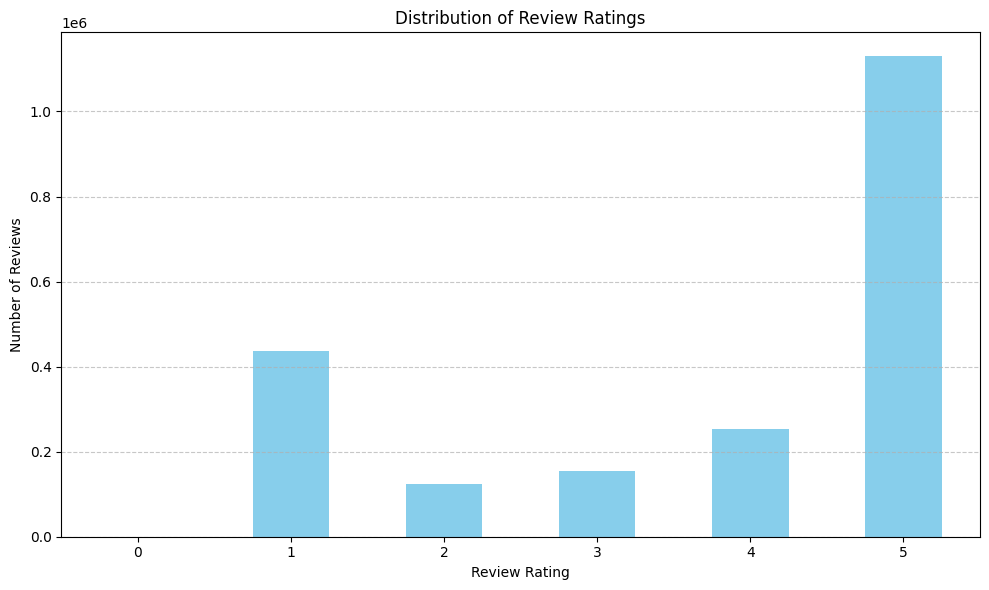

In [ ]:
import matplotlib.pyplot as plt

# Creating a histogram for the review ratings (1-5)
plt.figure(figsize=(10, 6))
df_cleaned['review_rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the percentage of each rating (1-5)
rating_counts = df_cleaned['review_rating'].value_counts().sort_index()
rating_percentages = (rating_counts / rating_counts.sum()) * 100

# Display the percentage of each rating
print(rating_percentages)

review_rating
0     0.000048
1    20.805434
2     5.919807
3     7.380041
4    12.092417
5    53.802253
Name: count, dtype: float64


In [ ]:
# Check the distribution of review ratings
print(df_cleaned['review_rating'].value_counts())

review_rating
5    1129666
1     436844
4     253900
3     154956
2     124296
0          1
Name: count, dtype: int64


In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Remove the rating 0 from the DataFrame
df_cleaned_filtered = df_cleaned[df_cleaned['review_rating'] != 0]

# Set the desired sample size
desired_sample_size = 100000

# Perform stratified sampling on the filtered DataFrame
df_sampled, _ = train_test_split(df_cleaned_filtered,
                                  train_size=desired_sample_size,
                                  stratify=df_cleaned_filtered['review_rating'],
                                  random_state=42)

# Convert review_timestamp to datetime if it's not already
df_sampled['review_timestamp'] = pd.to_datetime(df_sampled['review_timestamp'])

# Sort the sampled DataFrame by review_timestamp (oldest to newest)
df_sampled_sorted = df_sampled.sort_values(by='review_timestamp')

# Reset index
df_sampled_sorted.reset_index(drop=True, inplace=True)

# Check the size and the first few rows of the sorted sampled DataFrame
print(f"Sampled DataFrame size: {df_sampled_sorted.shape[0]}")
df_sampled_sorted.head()

Sampled DataFrame size: 100000


,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,awesum,5,0,1.1.0.112,2014-05-27 17:58:20
1,only music service i use keep the updates coming,5,0,1.1.0.112,2014-05-27 18:41:58
2,fantastic app great music,5,0,1.1.0.112,2014-05-27 21:06:30
3,so much better than pandora and better than ih...,5,0,1.1.0.112,2014-05-27 21:36:49
4,way better than rhapsody,5,0,1.1.0.112,2014-05-27 22:22:00


In [ ]:
# Calculate the percentage of each rating (1-5)
rating_counts = df_sampled['review_rating'].value_counts().sort_index()
rating_percentages = (rating_counts / rating_counts.sum()) * 100

# Display the percentage of each rating
print(rating_percentages)

review_rating
1    20.806
2     5.920
3     7.380
4    12.092
5    53.802
Name: count, dtype: float64


As we can see, the data sampled maintain the distribution of the ratings

**Download the cleaned data**

In [ ]:
df_cleaned.dropna()

,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,i enjoy the awesome ui of this app and it has ...,5,4,1.1.0.91,2014-05-27 14:36:02
2,love it especially the new design,5,2,1.1.0.91,2014-05-27 14:40:01
3,awesome ui best music app out there,5,1,1.1.0.91,2014-05-27 15:17:20
4,as a professional android developer im glad to...,5,10,1.1.0.91,2014-05-27 15:26:48
...,...,...,...,...,...
2099658,bring back liked songs button new add button i...,2,0,8.8.82.634,2023-11-15 23:06:56
2099659,does not work always says no internet but u tu...,1,0,8.8.82.634,2023-11-15 23:11:02
2099660,the blues always pull me through,5,0,8.8.82.634,2023-11-15 23:11:32
2099661,awesome but you cant choose your song sometimes,4,0,8.8.82.634,2023-11-15 23:15:45


In [ ]:
df_cleaned_row = df_cleaned.shape[0]
print(f"Number of rows after dropping duplicates: {df_cleaned_row}")

Number of rows after dropping duplicates: 2099663


In [ ]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('cleaned_spotify_reviews.csv', index=False)

print("Cleaned data saved to 'cleaned_spotify_reviews.csv'")
files.download('cleaned_spotify_reviews.csv')

Cleaned data saved to 'cleaned_spotify_reviews.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df2 = pd.read_csv('/content/cleaned_spotify_reviews.csv')

print(f"Number of rows of the cleaned data: {df2.shape[0]}")

Number of rows of the cleaned data: 2099663


**Download sampled data**

In [ ]:
# Save the cleaned DataFrame to a CSV file
df_sampled.to_csv('sampled_reviews.csv', index=False)

print("Cleaned data saved to 'sampled_reviews.csv'")
files.download('sampled_reviews.csv')

Cleaned data saved to 'sampled_reviews.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>